In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)
# coordinate info of sample sites
geo = pd.read_csv(r"../data/Emma Sumner/field_sorghum_locations.csv")

In [51]:
pd.merge(left=geo, right=sorghum, left_on="soil_sample_ID", right_on="customer_sample_id", )

,site_name,species_name,latitude_x,longitude_x,date_sampled,soil_sample_ID,code,Name,lab_number,date_received,...,ph_level_cacl2,ph_level_h2o,total_nitrogen,total_phosphorus,total_carbon,prcnt_clay,prcnt_course_sand,prcnt_fine_sand,prcnt_sand,prcnt_silt
0,Kununurra_WA,Sorghum bulbosum,-15.965052,128.957012,24/03/2024,S1,SB_WA,Sorghum bulbosum,2KGS24043,12/09/2024,...,5.9,6.6,0.02,84.9,0.40,9.87,63.40,22.77,86.17,3.97
1,Derby_WA,Sorghum ecarinatum,-17.354575,123.741343,27/03/2024,S2,SE_WA,Sorghum ecarinatum,2KGS24044,12/09/2024,...,5.6,6.6,0.03,56.3,0.53,6.93,59.63,31.45,91.08,2.00
2,Charles_Darwin_NP_NT,Sorghum exstans,-12.434222,130.876718,27/02/2024,S3,SE_NT,Sorghum exstans,2KGS24045,12/09/2024,...,5.7,6.6,0.09,108.5,2.41,15.86,38.85,36.80,75.65,8.49
3,Kununurra_WA,Sorghum interjectum,-15.992228,128.974654,24/03/2024,S4,SI_WA,Sorghum interjectum,2KGS24046,12/09/2024,...,6.0,6.7,0.05,118.8,0.54,9.20,50.41,27.01,77.42,13.37
4,Katherine_NT,Sorghum intrans,-14.407553,132.197353,2/03/2024,S5,SI_NT,Sorghum intrans,2KGS24047,12/09/2024,...,6.0,6.8,0.03,176.2,0.44,43.07,29.41,18.50,47.91,9.02
5,Drake_NSW,Sorghum leiocladum,-28.941111,152.428611,25/01/2024,S6,SL_NSW,Sorghum leiocladum,2KGS24048,12/09/2024,...,6.0,6.5,0.22,237.2,3.89,14.71,18.75,46.50,65.25,20.04
6,Katherine_NT,Sorghum macrospermum,-14.407640,132.197460,2/03/2024,S7,SM_NT,Sorghum macrospermum,2KGS24049,12/09/2024,...,6.1,6.8,0.22,684.7,3.65,25.68,4.38,30.35,34.73,39.58
7,Daly_Waters_NT,Sorghum plumosum,-16.062387,133.428109,3/03/2024,S8,SP_DW_NT,Sorghum plumosum,2KGS24050,12/09/2024,...,7.1,8.2,0.03,169.4,1.30,8.08,64.16,21.66,85.82,6.10
8,Kununurra_WA,Sorghum plumosum var. teretifolium,-15.992164,128.984524,24/03/2024,S9,SPT_WA,Sorghum plumosum var. teretifolium,2KGS24051,12/09/2024,...,5.8,6.8,0.09,139.5,1.34,10.87,42.47,34.76,77.23,11.91
9,Mitchell_Ck_NT,Sorghum stipoideum,-12.511434,130.996383,5/03/2024,S10,SS_NT,Sorghum stipoideum,2KGS24052,12/09/2024,...,5.6,6.5,0.12,131.8,2.23,10.26,52.36,28.10,80.46,9.28


# ___Chemical properties___
-----------------

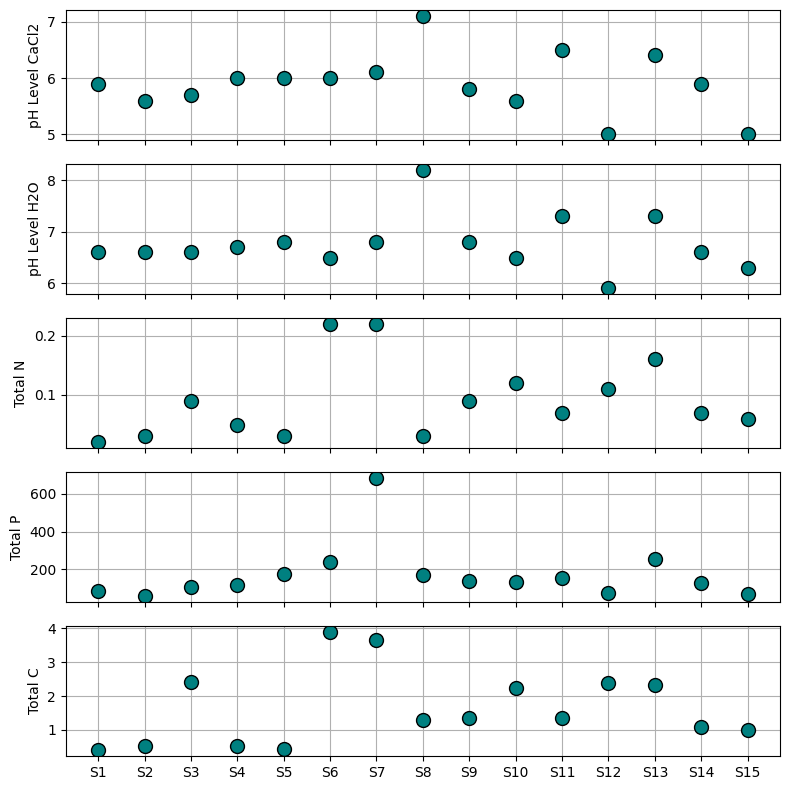

In [8]:
fig, axes = plt.subplots(nrows=5, sharex=True, sharey=False)
fig.set_size_inches(8, 8)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis.set_ylabel(name, loc="center")
    axis.grid()
    
plt.tight_layout()
plt.show()

# ___Soil texture___
--------------

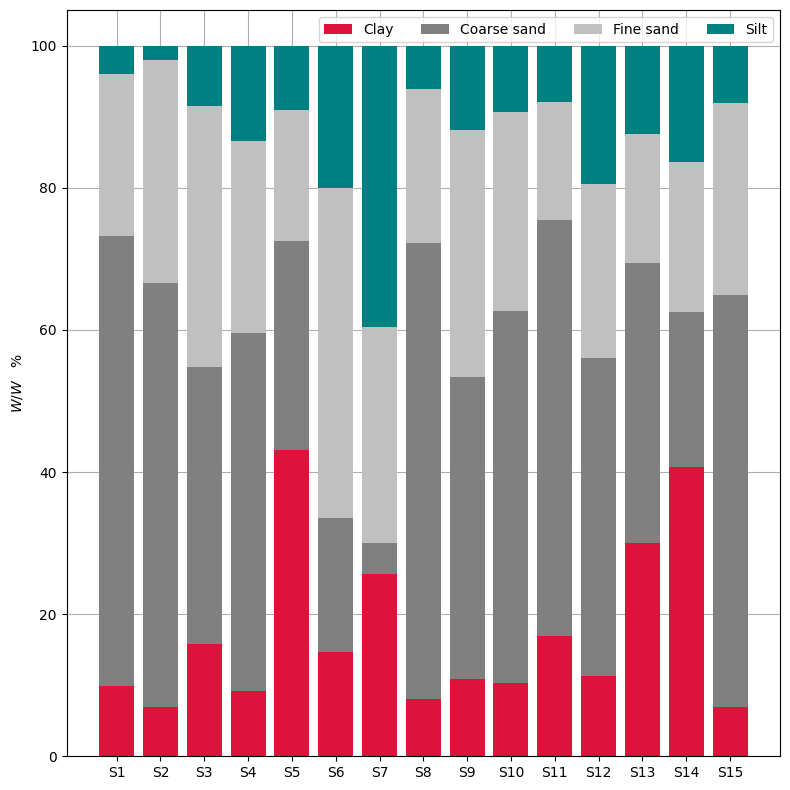

In [10]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_course_sand, bottom=sorghum.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_fine_sand, bottom=sorghum.prcnt_clay+sorghum.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right")
axes.set_ylabel(r"$W/W\hspace{1}\%$")
axes.set_axisbelow(True)
axes.grid()
axes.legend(loc="upper right", ncols=4)
plt.tight_layout()
plt.show()

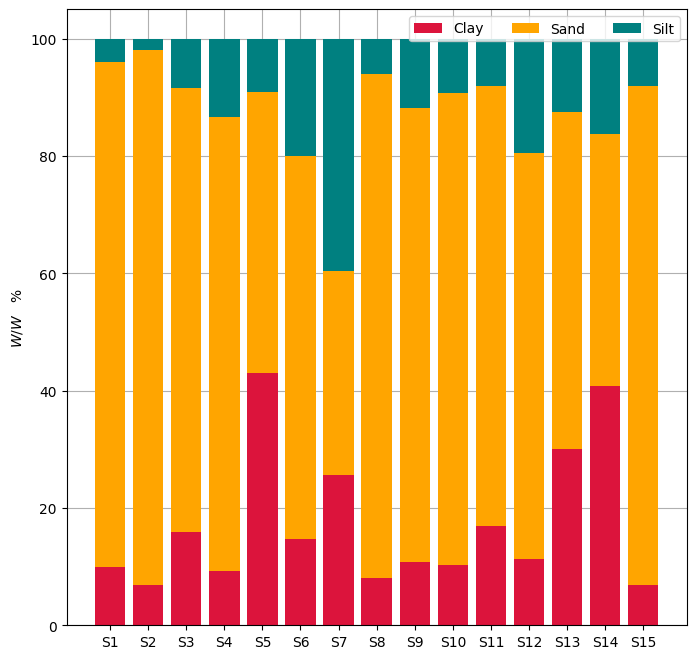

In [13]:
# without differentiating sand into coarse and fine sand
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_sand, bottom=sorghum.prcnt_clay, color="orange", label="Sand")
axes.bar(x=sorghum.customer_sample_id, height=sorghum.prcnt_silt, bottom=sorghum.prcnt_clay+sorghum.prcnt_sand, color="teal", label="Silt")
axes.legend(loc="upper right", ncols=3)
axes.set_axisbelow(True)
axes.grid()
axes.set_ylabel(r"$W/W\hspace{1}\%$")
plt.show()

# ___Goegraphics___
-------------

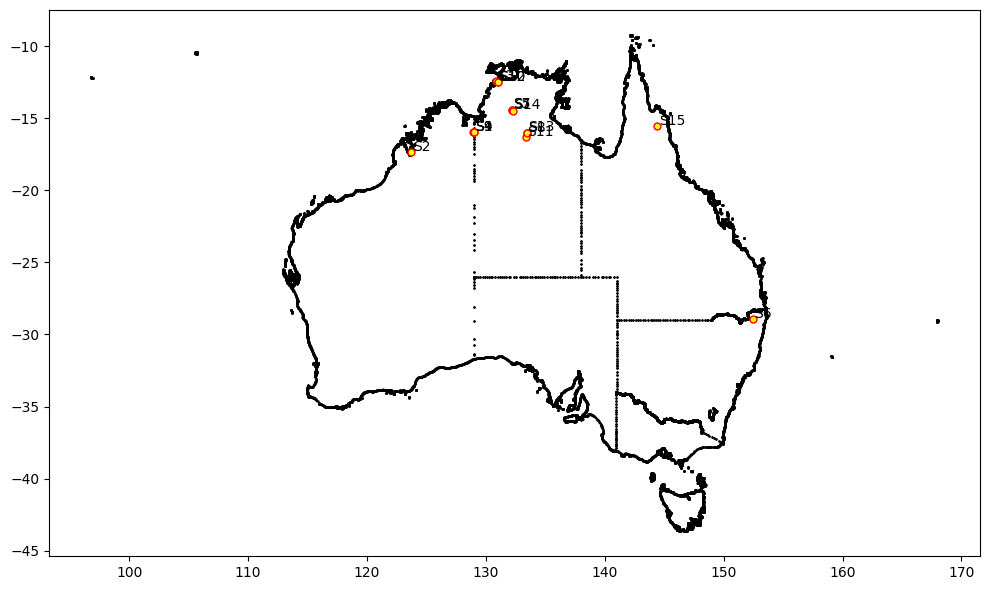

In [45]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
plt.tight_layout()
plt.show()

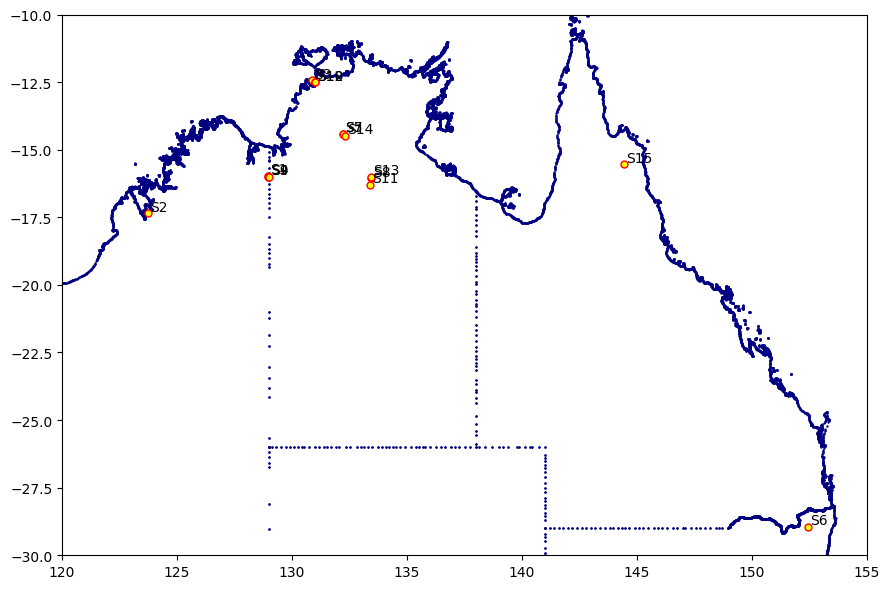

In [46]:
fig, axes = plt.subplots()
fig.set_size_inches(9, 6)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="red", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
# axes.legend()
axes.set_ylim(-30, -10)
axes.set_xlim(120, 155)
plt.tight_layout()
plt.show()